# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
# http://pytorch.org/
from os.path import exists
#!pip install numpy==1.15.0
!pip install -q install wheel==0.34.2 setuptools

from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
print(get_abbr_impl())
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#https://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp37-cp37m-linux_x86_64.whl
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1.post2-{platform}-linux_x86_64.whl torchvision==0.2.1
import torch

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.12.0 which is incompatible.
cp
  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl
ERROR: Could not install requirement torch==0.4.1.post2 from http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl for URL http://download.pytorch.org/whl/cpu/torch-0.4.1.post2-cp310-cp310-linux_x86_64.whl


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [70]:
batch_size = 1000

### Carregamento, criação dataset e do dataloader

In [71]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [72]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando apenas 1000 amostras do MNIST

Neste exemplo utilizaremos 1000 amostras de treinamento.

In [73]:
if False:
    n_samples_train = 1000

    dataset_train.train_data = dataset_train.train_data[:n_samples_train]
    dataset_train.train_labels = dataset_train.train_labels[:n_samples_train]

print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 60


## Modelo

In [74]:
model = torch.nn.Linear(28*28, 10)


In [75]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.6022, -0.7682, -0.0587, -0.2184, -0.2332, -0.1475,  0.2915, -0.7081,
          0.1519, -0.1392]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [76]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [77]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.item())

        print(f'Época: {i}/{n_epochs-1} batch: {(k+1)}/{len(loader_train)}')

Época: 0/4 batch: 1/60
Época: 0/4 batch: 2/60
Época: 0/4 batch: 3/60
Época: 0/4 batch: 4/60
Época: 0/4 batch: 5/60
Época: 0/4 batch: 6/60
Época: 0/4 batch: 7/60
Época: 0/4 batch: 8/60
Época: 0/4 batch: 9/60
Época: 0/4 batch: 10/60
Época: 0/4 batch: 11/60
Época: 0/4 batch: 12/60
Época: 0/4 batch: 13/60
Época: 0/4 batch: 14/60
Época: 0/4 batch: 15/60
Época: 0/4 batch: 16/60
Época: 0/4 batch: 17/60
Época: 0/4 batch: 18/60
Época: 0/4 batch: 19/60
Época: 0/4 batch: 20/60
Época: 0/4 batch: 21/60
Época: 0/4 batch: 22/60
Época: 0/4 batch: 23/60
Época: 0/4 batch: 24/60
Época: 0/4 batch: 25/60
Época: 0/4 batch: 26/60
Época: 0/4 batch: 27/60
Época: 0/4 batch: 28/60
Época: 0/4 batch: 29/60
Época: 0/4 batch: 30/60
Época: 0/4 batch: 31/60
Época: 0/4 batch: 32/60
Época: 0/4 batch: 33/60
Época: 0/4 batch: 34/60
Época: 0/4 batch: 35/60
Época: 0/4 batch: 36/60
Época: 0/4 batch: 37/60
Época: 0/4 batch: 38/60
Época: 0/4 batch: 39/60
Época: 0/4 batch: 40/60
Época: 0/4 batch: 41/60
Época: 0/4 batch: 42/60
É

In [78]:
print('Final loss:', loss.item())

Final loss: 0.2867918908596039


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

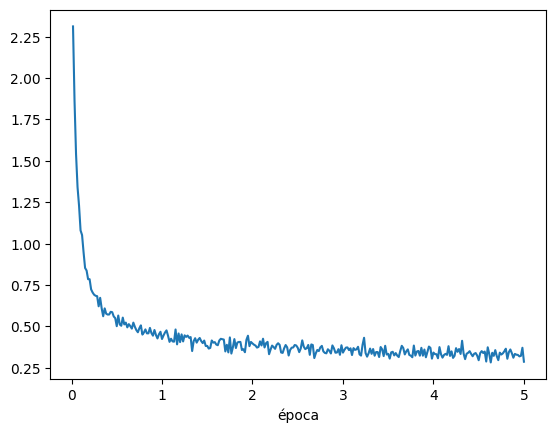

In [79]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

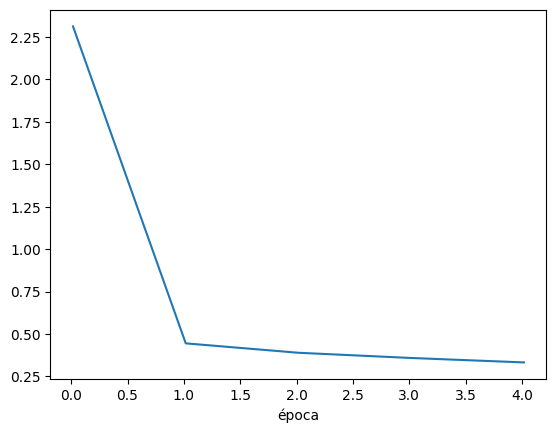

In [80]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch? R. 1000
2. Em uma época, quantos mini-batches existem? R. 60
3. Qual é a definição de época? R. Ela é a iteração sobre todos os dados de treinamento para o treinamento da rede.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 3/10
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.
    
    R. Foram testados os seguintes cenários batch size de 100, 600 e 1000. Analisando os gráficos, parece que quanto maior o batch size, mais rápida é a queda da perda em função da época. Entretanto, a perda acaba variando mais dentro de cada época.

## Conclusões sobre os experimentos deste notebook


1. O mini-batch contribui com a rapidez da convergência, num mesmo número de épocas
2. Os resultado pode ser mais ruidoso
